In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the original dataset again
file_path = "Salary_Data.csv"
df = pd.read_csv(file_path)

# Step 1: Basic cleaning - drop rows with missing values
df_cleaned = df.dropna().reset_index(drop=True)

# Step 2: EDA - summary statistics
summary = df_cleaned.describe(include='all')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [2]:
summary

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,6698.000000,6698,6698,6698,6698.000000,6698.000000
unique,NaN,3,7,191,NaN,NaN
top,NaN,Male,Bachelor's Degree,Software Engineer,NaN,NaN
freq,NaN,3671,2265,518,NaN,NaN
mean,33.623022,NaN,NaN,NaN,8.095178,115329.253061
std,7.615784,NaN,NaN,NaN,6.060291,52789.792507
min,21.000000,NaN,NaN,NaN,0.000000,350.000000
25%,28.000000,NaN,NaN,NaN,3.000000,70000.000000
50%,32.000000,NaN,NaN,NaN,7.000000,115000.000000
75%,38.000000,NaN,NaN,NaN,12.000000,160000.000000


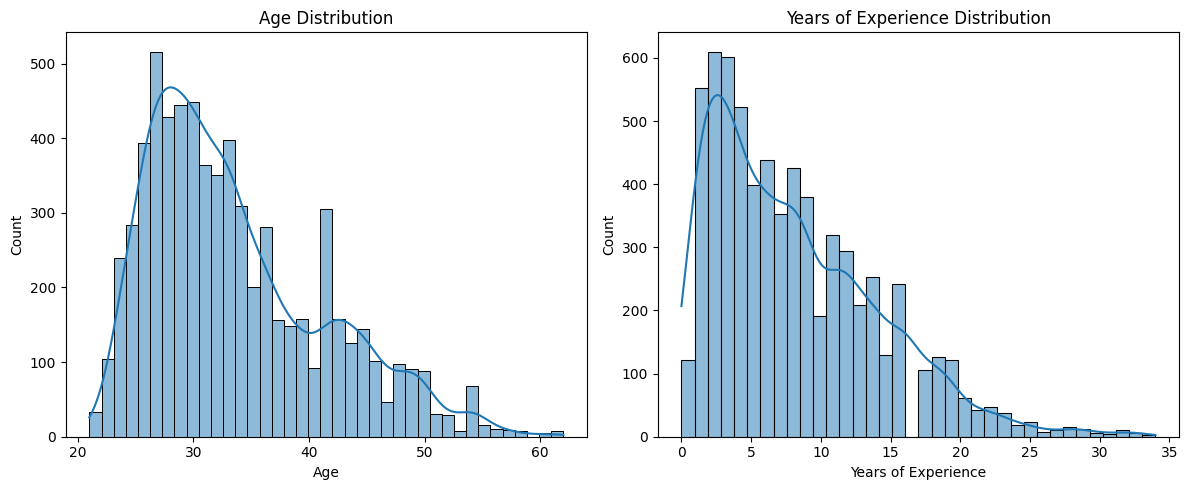

In [3]:
# Step 3: Distribution plots for numeric features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Years of Experience'], kde=True)
plt.title('Years of Experience Distribution')
plt.tight_layout()
plt.show()

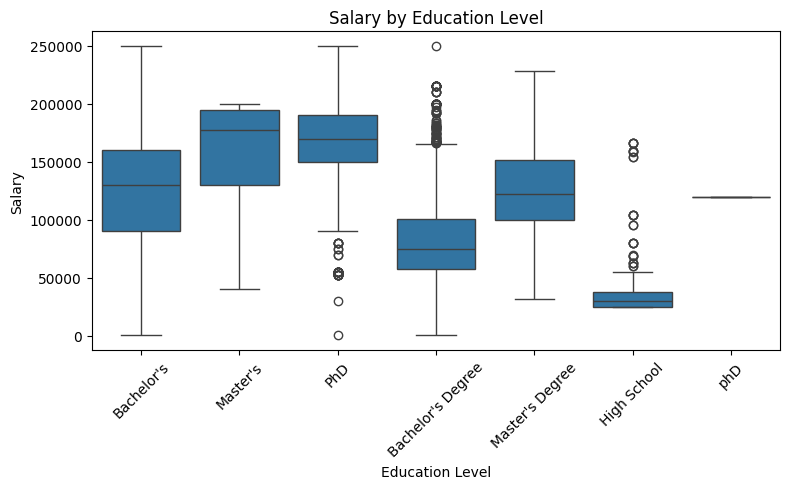

In [4]:
# Step 4: Box plot of Salary by Education Level
plt.figure(figsize=(8, 5))
sns.boxplot(x='Education Level', y='Salary', data=df_cleaned)
plt.title('Salary by Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

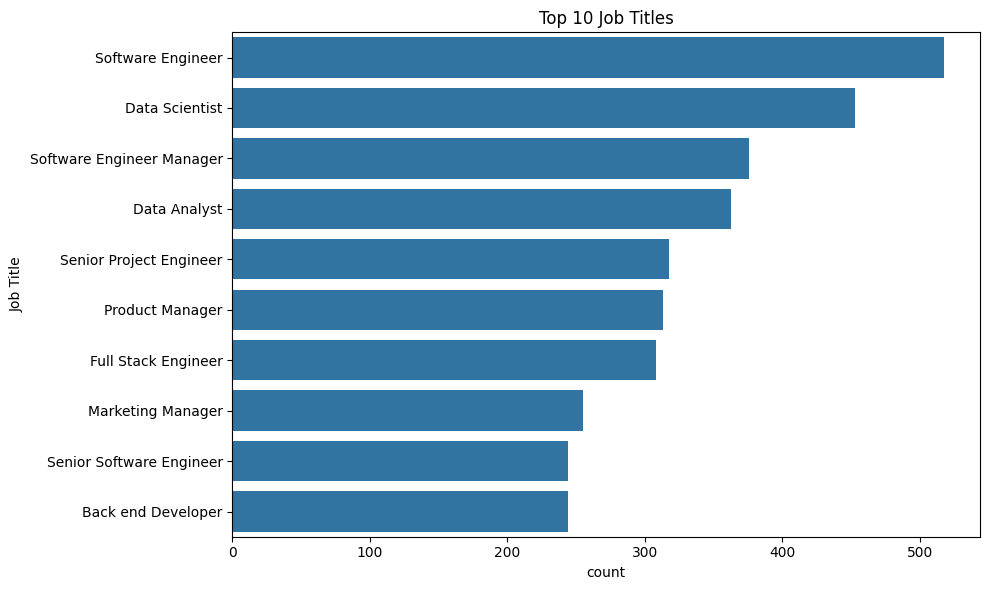

In [5]:
# Step 5: Count plot for Job Titles
plt.figure(figsize=(10, 6))
sns.countplot(y='Job Title', data=df_cleaned, order=df_cleaned['Job Title'].value_counts().index[:10])
plt.title('Top 10 Job Titles')
plt.tight_layout()
plt.show()

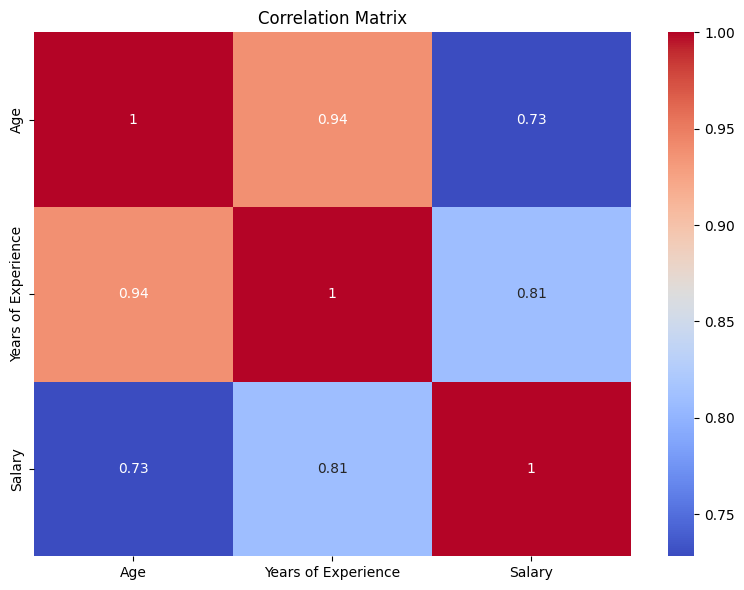

In [6]:
# Step 6: Correlation heatmap for numeric features
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [7]:
# Check how many null values are in each column
df.isnull().sum()


Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [8]:
# Drop rows with any missing values
df_cleaned = df.dropna().reset_index(drop=True)

# Confirm it's clean now
df_cleaned.isnull().sum()


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler

# Step 1: One-Hot Encode Categorical Variables
df_encoded = pd.get_dummies(df_cleaned, columns=['Gender', 'Education Level', 'Job Title'], drop_first=True)
df_encoded = df_encoded.astype(int)
# Step 2: Scale Numerical Features (Age, Years of Experience)
scaler = StandardScaler()
df_encoded[['Age', 'Years of Experience']] = scaler.fit_transform(df_encoded[['Age', 'Years of Experience']])

# Step 3: Add Weighted Experience Feature
df_encoded['Weighted Experience'] = df_cleaned['Years of Experience'] * 2  # Using original unscaled values for weighting


In [10]:
df_encoded.head()

,Age,Years of Experience,Salary,Gender_Male,Gender_Other,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's,Education Level_Master's Degree,Education Level_PhD,...,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer,Weighted Experience
0,-0.213129,-0.510515,90000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.0
1,-0.738393,-0.840497,65000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6.0
2,1.493980,1.139392,150000,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,30.0
3,0.312135,-0.180534,60000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14.0
4,2.413192,1.964345,200000,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,40.0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split into features (X) and target (y)
X = df_encoded.drop(columns=['Salary'])
y = df_encoded['Salary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

# Train & evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'R2 Score': round(r2, 4)
    }

# Print results
import pandas as pd
results_df = pd.DataFrame(results).T
results_df


,MAE,RMSE,R2 Score
Linear Regression,13157.80,18763.67,0.8765
Random Forest,2805.73,7134.41,0.9821
XGBoost,4927.91,7894.73,0.9781


In [40]:
import joblib

# Save the trained Random Forest model
joblib.dump(models['Random Forest'], 'salary_predictor_rf_model.pkl')


['salary_predictor_rf_model.pkl']

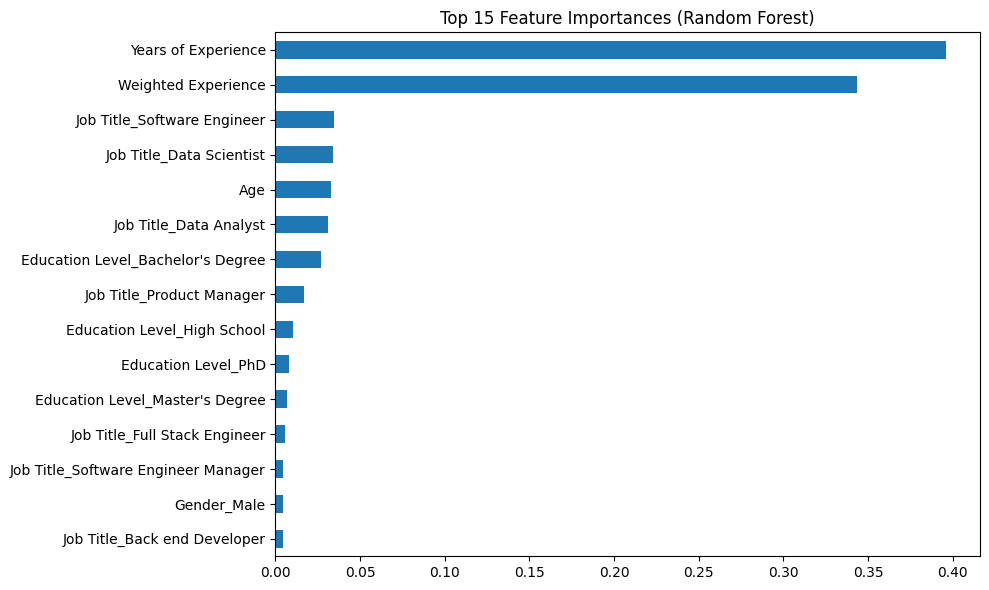

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = models['Random Forest'].feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
feat_imp.head(15).plot(kind='barh')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [42]:
import fitz  # PyMuPDF

def extract_resume_text(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text()
    return text


In [43]:
def extract_education(text):
    text = text.lower()
    if "phd" in text or "doctorate" in text:
        return "PhD"
    elif "master" in text:
        return "Master's"
    elif "bachelor" in text:
        return "Bachelor's"
    else:
        return "Unknown"


In [44]:
def extract_job_title(text):
    job_titles = [
        "Data Analyst", "Software Engineer", "Data Scientist", "Product Manager",
        "Software Developer", "Business Analyst", "Marketing Manager", "Consultant", 
        "Intern", "Project Manager", "Developer", "Research Assistant"
    ]
    text_lower = text.lower()
    for title in job_titles:
        if title.lower() in text_lower:
            return title
    return "Unknown"


In [45]:
def extract_years_of_experience(text):
    total_months = 0

    # Only use lines under WORK EXPERIENCE section
    relevant_section = re.findall(r'(PROFESSIONAL EXPERIENCE|WORK EXPERIENCE)(.*?)(PROJECTS|SKILLS|EDUCATION)', text, re.DOTALL | re.IGNORECASE)
    if relevant_section:
        text = relevant_section[0][1]

    # Continue with parsing date ranges
    apostrophe_patterns = re.findall(r"([A-Za-z]{3,9}['’]\d{2})\s*[-–—]\s*([A-Za-z]{3,9}['’]\d{2})", text)
    full_date_patterns = re.findall(r"([A-Za-z]{3,9}\.?\s?\d{4})\s*[-–—]\s*([A-Za-z]{3,9}\.?\s?\d{4})", text)

    for start_str, end_str in apostrophe_patterns + full_date_patterns:
        try:
            start = parser.parse(start_str.replace('’', "'").replace('.', '').strip())
            end = parser.parse(end_str.replace('’', "'").replace('.', '').strip())
            months = (end.year - start.year) * 12 + (end.month - start.month)
            total_months += max(months, 0)
        except:
            continue

    return round(total_months / 12, 1)


In [48]:
resume_text = extract_resume_text("Amit Gangane_Resume.pdf")

job_title = extract_job_title(resume_text)
education = extract_education(resume_text)
experience = extract_years_of_experience(resume_text)

print("Extracted Job Title:", job_title)
print("Extracted Education Level:", education)
print("Extracted Years of Experience:", experience)


Extracted Job Title: Data Analyst
Extracted Education Level: Master's
Extracted Years of Experience: 0.4


In [49]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler

# ---- Step 1: Load your trained model ----
model = joblib.load("salary_predictor_rf_model.pkl")  

# ---- Step 2: Extracted resume inputs ----
resume_input = {
    "Education Level": education,
    "Job Title": job_title,
    "Years of Experience": experience  #
}

# ---- Step 3: Convert to DataFrame ----
input_df = pd.DataFrame([resume_input])

# ---- Step 4: One-hot encode categorical features ----
# Use same columns from training data
encoded_input = pd.get_dummies(input_df)

# ---- Step 5: Add missing dummy columns from training ----
for col in X.columns:
    if col not in encoded_input.columns:
        encoded_input[col] = 0

# Reorder columns to match training set
encoded_input = encoded_input[X.columns]

# ---- Step 6: Predict Salary ----
predicted_salary = model.predict(encoded_input)[0]
print(f"Predicted Salary: ${predicted_salary:,.2f}")


Predicted Salary: $117,021.71


C:\Users\Amit\AppData\Local\Temp\ipykernel_17508\1526068224.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encoded_input[col] = 0
C:\Users\Amit\AppData\Local\Temp\ipykernel_17508\1526068224.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encoded_input[col] = 0
C:\Users\Amit\AppData\Local\Temp\ipykernel_17508\1526068224.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co